<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)
df = yelp

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [3]:
pip install -U gensim

Requirement already up-to-date: gensim in /Users/Person/anaconda3/envs/NLP/lib/python3.7/site-packages (3.8.1)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# To remove emails and newline characters: 
# Convert to list
data = df.text.values.tolist()

# Remove Emails
#data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])

<>:9: DeprecationWarning: invalid escape sequence \s
<>:9: DeprecationWarning: invalid escape sequence \s
<>:9: DeprecationWarning: invalid escape sequence \s
<ipython-input-5-5975f11db9db>:9: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


['BEWARE!!! FAKE, FAKE, FAKE....We also own a small business in Los Alamitos, CA and received what looked like a legitimate bill for $70 with an account number and all. I called the phone number listed (866) 273-7934. The wait time on hold said 20 minutes and to leave a message. I could not get a live person on the phone no matter what number I selected. I left a very FIRM message that I would be contacting the BBB and my attorney regarding their company trying to scam businesses. This has to be illegal!!!!!']


In [6]:
# Write a function to tokenize the Yelp reviews from the called dataset
def tokenize(doc):
    for sentence in doc:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(tokenize(data))

In [7]:
# To create bigram and trigram models:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['beware', 'fake', 'fake', 'fake', 'we', 'also', 'own', 'small', 'business', 'in', 'los', 'alamitos', 'ca', 'and', 'received', 'what', 'looked', 'like', 'legitimate', 'bill', 'for', 'with', 'an', 'account', 'number', 'and', 'all', 'called', 'the', 'phone', 'number', 'listed', 'the', 'wait', 'time', 'on', 'hold', 'said', 'minutes', 'and', 'to', 'leave', 'message', 'could', 'not', 'get', 'live', 'person', 'on', 'the', 'phone', 'no', 'matter', 'what', 'number', 'selected', 'left', 'very', 'firm', 'message', 'that', 'would', 'be', 'contacting', 'the', 'bbb', 'and', 'my', 'attorney', 'regarding', 'their', 'company', 'trying', 'to', 'scam', 'businesses', 'this', 'has', 'to', 'be', 'illegal']


In [8]:
# To remove stopwords, make bigrams and lemmatize:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in STOPWORDS] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Write a function to lemmatize tokens
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [9]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [10]:
#data_words[0]
data_lemmatized[1]

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [11]:
# Use spacy for stop words
nlp = spacy.load("en_core_web_lg")

STOP_WORDS = nlp.Defaults.stop_words.union('and','or','of','to','a','for','with','be','in','you','we','on','our',' ','<>')

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words=STOP_WORDS, max_features=5000)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df['text'])

# View Feature Matrix as DataFrame
docs = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
docs.head()

/Users/Person/anaconda3/envs/NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,00,000,00pm,07,10,100,1000,101,10pm,11,...,yuck,yuk,yum,yummy,yup,zero,zone,zoo,zucchini,était
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

# Fit on TF-IDF Vectors
nn.fit(dtm.todense())

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [14]:
df['text'].iloc[276][:300]

'Loved it. As close as you will get to an east coast seafood boil. Just missing the beach.\n\nThe food was outstanding.  The service was even better. \nOur table was not on a budget so we pretty much ordered the seafood menu for the bag boil.\nAll the seafood was fresh, cooked, and seasoned perfectly. We'

In [15]:
# Instantiate a fake review
fake_review = ["""The food was bizare, truly out of this world. The colors were just so.. engorging. 
I was stuck in a trance by the smell of the joint. But the fries! Oooooo, the fries. What I could say 
and keep saying and keep saying about that curry too. Garnish your life with a trip to this place. 
"""]

In [16]:
new = tfidf.transform(fake_review)
nn.kneighbors(new.todense())

(array([[1.        , 1.        , 1.2329492 , 1.25762965, 1.26524762,
         1.27767143, 1.28027841, 1.28690364, 1.28831161, 1.28874536]]),
 array([[6204, 6311, 9033, 7704, 4735, 8353,  114, 8913, 2336, 5811]]))

In [17]:
# Print the 10 most-like reviews
similar_reviews = 6204, 6311, 9033, 7704, 4735, 8353,  114, 8913, 2336, 5811
for review in similar_reviews:
    print(df['text'].iloc[review][:2000])

旅行でラスベガスに来ましたがネイルがはげてるのが気になり、探したお店でした。
質問にも丁寧に答えてくれましたし、日本人の方も日本語が話せる方も居て、とても綺麗で居心地のいいお店でした。 
ネイルはちはるさんと言う綺麗な方が丁寧にしてくれとても気に入りました。
予定になかったまつ毛エクステもお願いし、日本ではまだあまりないブラウンカラーのエクステをしてもらい、とても気に入りました。
また是非マッサージなどで伺いたいと思います。
天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來
If I lived closer, this would be a place that I'd like to visit more often to try everything. 

The Fez Burger was really good, but I felt it to be a tad too sweet. 

I didn't like how they substituted the salad for fries and charged me the full price for a side of fries anyways. Otherwise this would be 4 stars. 

The way the menu looked it was if you could substitute for fries or for an extra fee add fries not both for the same price. On the upside, the fries were pretty good. I tried my friend's salad and it was really good too.
Tasty burgers, shake and fries. Fries weren't hot, just warm.
I'll start off by letting you this is not a fast food joint.  You can get your burger and fr

### Patterns from above? Two words: 'curry' and 'fries' 
Many of the subjects of the reviews are American-fare type restaurants, presumably featuring menus with a heavy bias towards burgers and sides. At least two of the 10 reviews from above mentioned curry. 

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [40]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
# Create Pipeline Components
vect = TfidfVectorizer(stop_words='english')
rfc = RandomForestClassifier()

In [42]:
# Define the Pipeline
pipe = Pipeline([
                 #Vectorizer
                 ('vect', vect), 
                 # Classifier
                 ('clf', rfc)
                ])

In [43]:
parameters = {
    'vect__max_df': ( 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators':(5, 10,),
    'clf__max_depth':(15,20)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(df.text, df.stars)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.75, 1.0), 'vect__min_df': (0.02, 0.05), 'vect__max_features': (500, 1000), 'clf__n_estimators': (5, 10), 'clf__max_depth': (15, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [44]:
grid_search.best_score_

0.5376

In [45]:
pred = grid_search.predict(df.text)
submission = pd.DataFrame({'id': df.stars, 'category':pred})
submission['category'] = submission['category'].astype('int64')

In [46]:
# Get a star-rating prediction for your fake review
pred_fake = grid_search.predict(fake_review)
print(pred_fake)  # output > 5 star

[5]


In [ ]:
# Try improving with latent semantic indexing (LSI) -> spoiler: doesn't offer improvement
from sklearn.decomposition import TruncatedSVD

#singular value decomposition component
svd = TruncatedSVD(n_components=100, 
                   algorithm='randomized',
                   n_iter=10)

In [ ]:
params = { 
    'lsi__svd__n_components': [10,100,250],
    'lsi__vect__max_df':[.9, .95, 1.0]
}

In [ ]:
# LSI
lsi = Pipeline([('vect', vect), ('svd', svd)])


# Pipe
pipe = Pipeline([('lsi', lsi), ('clf', rfc)])

In [ ]:
# Fit
grid_search = GridSearchCV(pipe,params, cv=5, n_jobs=4, verbose=1)
grid_search.fit(df.text, df.stars)

In [ ]:
grid_search.best_score_

In [ ]:
# Get prediction for fake_review
fake_pred = grid_search.predict(fake_review)
print(fake_pred) # output > 5 star again

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [31]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

Learn the vocubalary of the yelp data:

In [76]:
# To create the dictionary and corpus needed for topic modeling
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 3), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)]]


In [33]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('account', 1),
  ('alamitos', 1),
  ('attorney', 1),
  ('bbb', 1),
  ('beware', 1),
  ('business', 2),
  ('ca', 1),
  ('call', 1),
  ('company', 1),
  ('contact', 1),
  ('fake', 3),
  ('firm', 1),
  ('hold', 1),
  ('illegal', 1),
  ('leave', 2),
  ('legitimate', 1),
  ('list', 1),
  ('live', 1),
  ('lo', 1),
  ('look', 1),
  ('matter', 1),
  ('message', 2),
  ('minute', 1),
  ('number', 3),
  ('person', 1),
  ('phone', 2),
  ('receive', 1),
  ('say', 1),
  ('scam', 1),
  ('select', 1),
  ('small', 1),
  ('time', 1),
  ('try', 1),
  ('wait', 1)]]

Your LDA model should be ready for estimation: 

In [34]:
lda_model = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

In [35]:
# To view the topics in the LDA model:
# Print the top 10 keywords in the topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

# output includes weights of each [key]word, 
#  reflecting their relative importance for each listed topic

[(0, '0.014*"good" + 0.014*"food" + 0.014*"not" + 0.011*"time" + 0.009*"place" + 0.008*"get" + 0.008*"do" + 0.007*"order" + 0.007*"service" + 0.007*"great"'), (1, '0.020*"not" + 0.011*"good" + 0.011*"time" + 0.010*"do" + 0.009*"food" + 0.009*"come" + 0.009*"place" + 0.008*"go" + 0.008*"be" + 0.008*"great"'), (2, '0.013*"good" + 0.012*"not" + 0.010*"do" + 0.009*"place" + 0.009*"be" + 0.009*"food" + 0.008*"time" + 0.008*"order" + 0.008*"get" + 0.008*"come"'), (3, '0.013*"food" + 0.013*"good" + 0.011*"place" + 0.010*"time" + 0.009*"not" + 0.009*"be" + 0.009*"great" + 0.008*"service" + 0.008*"come" + 0.007*"try"'), (4, '0.014*"place" + 0.013*"good" + 0.013*"not" + 0.011*"food" + 0.010*"great" + 0.008*"go" + 0.008*"be" + 0.008*"come" + 0.008*"get" + 0.007*"service"'), (5, '0.014*"not" + 0.011*"good" + 0.010*"be" + 0.009*"food" + 0.008*"place" + 0.008*"great" + 0.008*"time" + 0.008*"service" + 0.007*"come" + 0.007*"order"'), (6, '0.014*"not" + 0.014*"good" + 0.013*"place" + 0.011*"great" + 0

In [47]:
# To compute model perplexity and coherence scores:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence-Score
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=data_lemmatized,
                                     dictionary=id2word, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# they are measures of how good a topic model is; focus on coherence - 
#  coherence = .355, not great


Perplexity:  -8.469710725517169

Coherence Score:  0.363135051741551


Create 1-2 visualizations of the results

In [ ]:
# To visualize the keywords of topics: (super taxing on my computer)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

# Each bubble represents a topic, with its size related to 
#  the topic's prevalence. Good topic models should have distinct, 
#  large, unclustered  bubbles

In [ ]:
# To find optimal number of topics (for LDA):
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model,
                                        texts=texts,
                                        dictionary=dictionary,
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                            corpus=corpus, 
                                            texts=data_lemmatized, 
                                            start=2, limit=40, step=6)

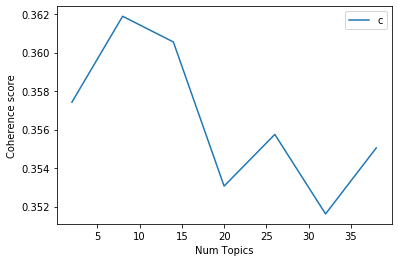

In [52]:
# Graph number of topics against coherence score
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show();

In [53]:
# Print coherence scores 
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# optimum model is that with 8 topics total

Num Topics = 2  has Coherence Value of 0.3574
Num Topics = 8  has Coherence Value of 0.3619
Num Topics = 14  has Coherence Value of 0.3606
Num Topics = 20  has Coherence Value of 0.3531
Num Topics = 26  has Coherence Value of 0.3558
Num Topics = 32  has Coherence Value of 0.3516
Num Topics = 38  has Coherence Value of 0.3551


In [59]:
# Select best model from listing (here, it's the second model, with 8 topics)
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)

# output the topics of the selected LDA model
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.017*"good" + 0.015*"service" + 0.012*"time" + 0.011*"love" + '
  '0.010*"order" + 0.009*"not" + 0.009*"be" + 0.008*"great" + 0.008*"food" + '
  '0.007*"place"'),
 (1,
  '0.021*"not" + 0.012*"do" + 0.011*"good" + 0.010*"time" + 0.009*"place" + '
  '0.008*"be" + 0.008*"food" + 0.007*"come" + 0.007*"great" + 0.006*"get"'),
 (2,
  '0.023*"good" + 0.018*"place" + 0.015*"food" + 0.015*"great" + 0.011*"be" + '
  '0.010*"not" + 0.008*"get" + 0.008*"go" + 0.007*"order" + 0.007*"time"'),
 (3,
  '0.016*"not" + 0.013*"place" + 0.012*"great" + 0.011*"do" + 0.009*"be" + '
  '0.009*"good" + 0.009*"come" + 0.008*"order" + 0.008*"time" + 0.008*"food"'),
 (4,
  '0.013*"place" + 0.013*"good" + 0.011*"food" + 0.010*"time" + 0.010*"not" + '
  '0.010*"come" + 0.009*"service" + 0.008*"have" + 0.008*"be" + 0.007*"great"'),
 (5,
  '0.011*"place" + 0.010*"not" + 0.008*"food" + 0.007*"be" + 0.007*"good" + '
  '0.007*"do" + 0.007*"time" + 0.007*"get" + 0.006*"come" + 0.005*"go"'),
 (6,
  '0.016*"good" +

In [78]:
# To find dominant topic in each doc:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(8)

# Feature Dominant_Topic tells which of the topics is most dominant
#  for a given document. In this case, as there are eight topics.

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.9796,"good, place, food, great, be, not, get, go, or...","BEWARE!!! FAKE, FAKE, FAKE....We also own a sm..."
1,1,0.0,0.9373,"good, service, time, love, order, not, be, gre...",Came here for lunch Togo. Service was quick. S...
2,2,3.0,0.6678,"not, place, great, do, be, good, come, order, ...",Ive been to Vegas dozens of times and had neve...
3,3,5.0,0.9538,"place, not, food, be, good, do, time, get, com...",We went here on a night where they closed off ...
4,4,6.0,0.7537,"good, place, time, not, great, get, service, f...","3.5 to 4 stars Not bad for the price, $12.99 f..."
5,5,3.0,0.7903,"not, place, great, do, be, good, come, order, ...","Tasty, fast casual Latin street food. The menu..."
6,6,1.0,0.9848,"not, do, good, time, place, be, food, come, gr...",This show is absolutely amazing!! What an incr...
7,7,2.0,0.9346,"good, place, food, great, be, not, get, go, or...",Came for the Pho and really enjoyed it! We got...


In [79]:
# To find the most representative document for each topic:
#  can be used to get a better idea of what a topic is 

# Group top 5 under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf.head(8)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9955,"good, service, time, love, order, not, be, gre...",Call me crazy but I love this place! It makes ...
1,1.0,0.9953,"not, do, good, time, place, be, food, come, gr...",Cant comment on after my root canal because it...
2,2.0,0.9959,"good, place, food, great, be, not, get, go, or...",Really disappointed in my dinner at Bottiglia....
3,3.0,0.9949,"not, place, great, do, be, good, come, order, ...",OH EM GEE!! This was some pretty damn good sus...
4,4.0,0.9953,"place, good, food, time, not, come, service, h...",I brought my dog here because he was dragging ...
5,5.0,0.9974,"place, not, food, be, good, do, time, get, com...","Like Brian T, I am surprised by the reviews. I..."
6,6.0,0.9970,"good, place, time, not, great, get, service, f...",For as much as we love both Vegas & dance musi...
7,7.0,0.9968,"not, food, good, come, service, do, order, go,...",At a mere six acres Esselmont Park is joined t...


In [85]:
# Gain insight into what the topics are

sent_topics_sorteddf.Text[7] # Hints at being tailored to parks or communal/recreational spaces 

sent_topics_sorteddf.Text[5] # Momofuku. Really. This topic hints at next-level, foodie havens

sent_topics_sorteddf.Text[0]

# Reading these two topics, one can make out that one is representative 
# of negative reviews while the other is representative of positive reviews

'Call me crazy but I love this place! It makes me kinda dance in my seat! Love anime but its funny while having a convo with hubby and our friend the random things I would hear coming from the TV...would make me almost repeat it and giggle :D http://www.yelp.com/user_local_photos?select=8HAUy7egm5Lgo2elWt2K_A&userid=zgV0ZroIF956gw4cul8MHA Here is why I love it: -the brown rice? hot tea -the mayu!!!!!!!!!! -the seafood udon -the kimchi -the green tea creme brûlée We ordered three hot teas and three waters they came out quickly and so we ordered edamame (they are just lightly salted) the calamari (tempura like fried, comes with mayo side and standard sweet chili side) and the chicken nugget like app (comes with ketchup and a soy like sauce?) I munched on the calamari and discovered all the sauces on the table I LOVE SPICY, I love how I immediately started dumping sriracha, mayu, chili oil, red pepper flakes, all on my side plate to smear my edamame and calamari in :) http://www.yelp.com/

In [63]:
# To get the distribution of topics across documents:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf[['Topic_Num', 'Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts.sort_index(), topic_contribution.sort_index()], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,0.0,"good, service, time, love, order, not, be, gre...",1321,0.1321
1,1.0,"not, do, good, time, place, be, food, come, gr...",973,0.0973
2,2.0,"good, place, food, great, be, not, get, go, or...",1450,0.1450
3,3.0,"not, place, great, do, be, good, come, order, ...",1505,0.1505
4,4.0,"place, good, food, time, not, come, service, h...",1215,0.1215
5,5.0,"place, not, food, be, good, do, time, get, com...",409,0.0409
6,6.0,"good, place, time, not, great, get, service, f...",976,0.0976
7,7.0,"not, food, good, come, service, do, order, go,...",2151,0.2151


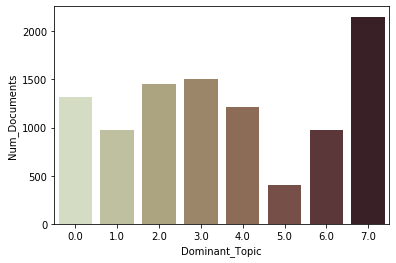

In [75]:
# Visualize the distribution of topics
import seaborn as sns

sns.barplot(x="Dominant_Topic", y="Num_Documents", palette="ch:.60", data=df_dominant_topics);

### Takeaway:
From the topic model conducted above, there are several takeaways. The first is that eight topics makes for an optimum lda-model. A visualization of the distribution of these topics, over the entire dataset used, is provided just above, and shows that the eighth topic is the most dominant in terms of the number of documents which may be classified as such. Alternatively, the sixth topic represents the fewest number of documents. But what exactly are these topics? 

Closer analysis of the text of each topic's most representative document can introduce insight into what the topics are. In the case of the eighth topic, the topic may have to do with parks and communal/recreational spaces. The fifth topic appears to be about upper-tier gastronomical institutions/experiences. The second topic may well just have to do with negative reviews of restaurants. Indeed, most of the topics appear to concern reviews of restaurants. 

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)